In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
import missingno as msno
from scipy import stats

In [3]:
df_raw = pd.read_csv("/kaggle/input/clothessizeprediction/final_test.csv")

print('Shape of the Dataset', df_raw.shape)
df_raw.info()
df_raw.head()

Shape of the Dataset (119734, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
#Handling missing values
df_raw['age'] = df_raw['age'].fillna(df_raw['age'].median()) 
df_raw['height'] = df_raw['height'].fillna(df_raw['height'].median())

<Axes: >

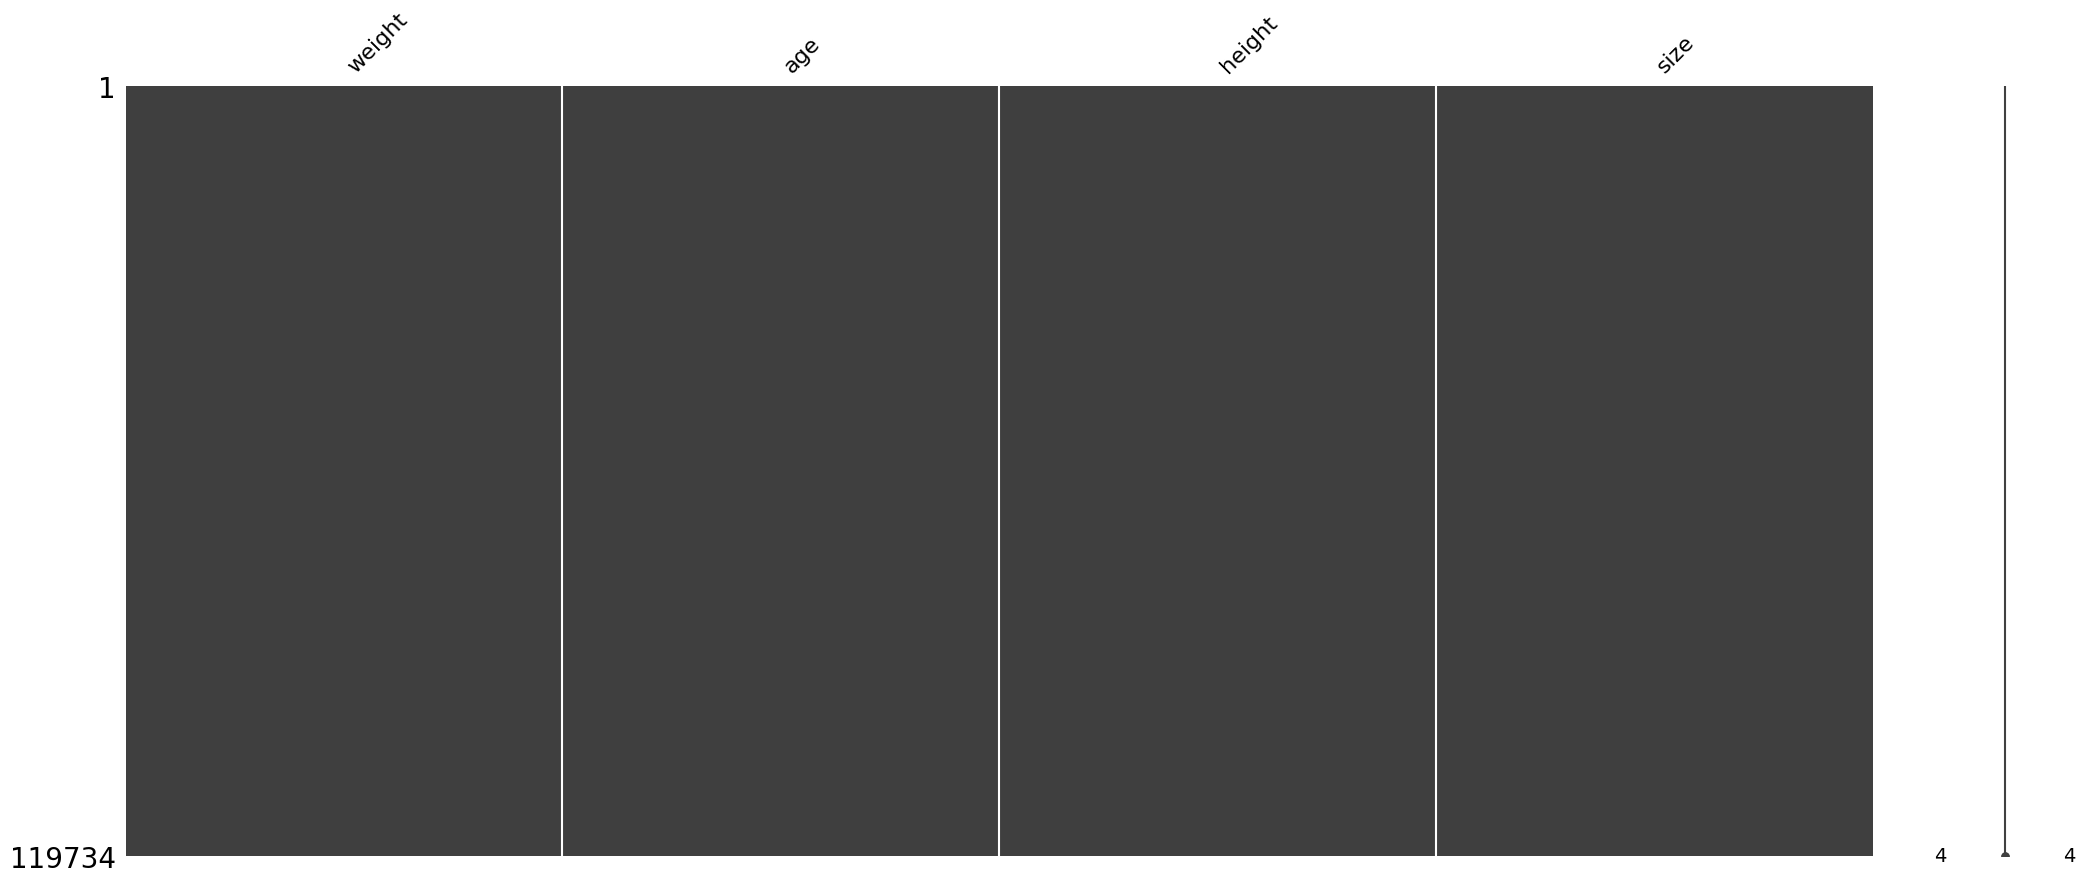

In [5]:
df_raw['size'] = df_raw['size'].map({
    "XXS": 1,
    "S": 2,
    "M": 3,
    "L": 4,
    "XL": 5,
    "XXL": 6,
    "XXXL": 7
})

# Last check for missing values
msno.matrix(df_raw)

In [6]:
X = df_raw[['weight', 'age', 'height']]
y= df_raw['size']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

#K-fold cross-validatach multiple metrics
cv_scores = cross_validate(mlp, X_train_scaled, y_train, cv=5, scoring=('accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'))

#Extract the cross-validation scores
cv_accuracy = cv_scores['test_accuracy']
cv_f1 = cv_scores['test_f1_weighted']
cv_precision = cv_scores['test_precision_weighted']
cv_recall = cv_scores['test_recall_weighted']

#Print the cross-validation results
print('Cross-Validation Results for MLP Classifier')
print('Accuracy Scores:', cv_accuracy)
print('F1 Scores:', cv_f1)
print('Precision Scores:', cv_precision)
print('Recall Scores:', cv_recall)

#Mean scores across all folds
print('Mean Accuracy:', np.mean(cv_accuracy))
print("Mean F1 Score:", np.mean(cv_f1))
print('Mean Precision:', np.mean(cv_precision))
print('Mean Recall:', np.mean(cv_recall))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Cross-Validation Results for MLP Classifier
Accuracy Scores: [0.51560706 0.51732958 0.51980999 0.51725218 0.52288981]
F1 Scores: [0.50443258 0.50921945 0.51002015 0.51012226 0.51541108]
Precision Scores: [0.50794393 0.51172475 0.51198907 0.51338026 0.51771525]
Recall Scores: [0.51560706 0.51732958 0.51980999 0.51725218 0.52288981]
Mean Accuracy: 0.518577721599079
Mean F1 Score: 0.509841104824647
Mean Precision: 0.5125506518655752
Mean Recall: 0.518577721599079


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.5155134254812711


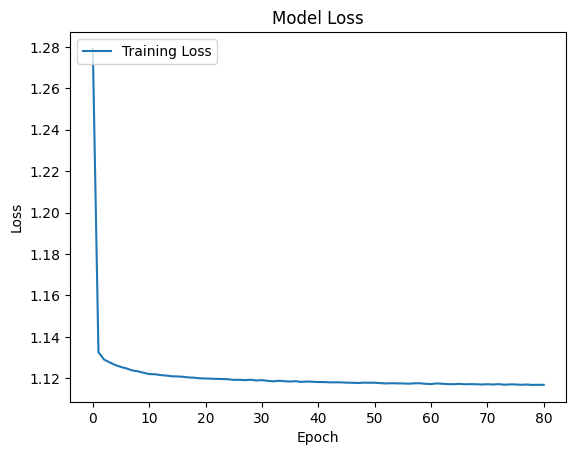

In [9]:
#Training the MLP Classifier
history = mlp.fit(X_train_scaled, y_train)

#Prediction
y_pred = mlp.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

#Plotting training vs validation loss
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


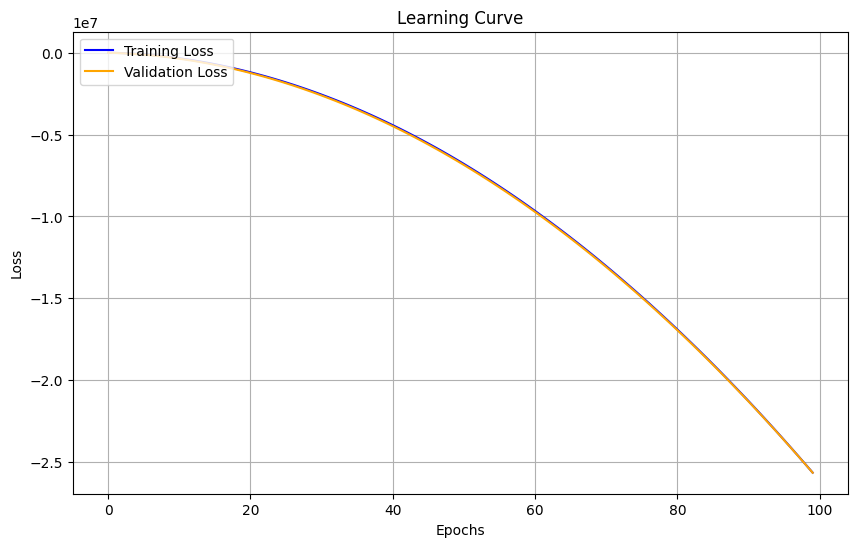

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#Define the MLP model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],))) 
model.add(Dense(1, activation='softmax')) #Gunakan 'softmax' jika lebih dari 2 kelas

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Ganti loss jika multi-class

# Fit the model and capture history
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.1, verbose=0)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [11]:
# Encoding yang ditingkatkan untuk kolom size menggunakan OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler

encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(df_raw[['size']])

# Menggunakan RobustScaler untuk menangani outlier dengan lebih baik
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_raw[['weight', 'age', 'height']])


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Mendefinisikan model MLP
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Softmax untuk klasifikasi multiclass

# Mengompilasi model dengan categorical_crossentropy untuk klasifikasi multiclass
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from keras.callbacks import EarlyStopping

# Early stopping untuk menghentikan pelatihan jika validasi loss tidak membaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(X_scaled, y_encoded, epochs=150, validation_split=0.2, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)


Epoch 1/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4906 - loss: 1.2019 - val_accuracy: 0.5103 - val_loss: 1.1308
Epoch 2/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5150 - loss: 1.1306 - val_accuracy: 0.5152 - val_loss: 1.1274
Epoch 3/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5138 - loss: 1.1242 - val_accuracy: 0.5111 - val_loss: 1.1290
Epoch 4/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5141 - loss: 1.1266 - val_accuracy: 0.5133 - val_loss: 1.1253
Epoch 5/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5150 - loss: 1.1235 - val_accuracy: 0.5109 - val_loss: 1.1284
Epoch 6/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5177 - loss: 1.1220 - val_accuracy: 0.5167 - val_loss: 1.1257
Epoch 7/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5162 - loss: 1.1249 - val_accuracy: 0.5168 - val_loss: 1.1232
Epoch 8/150
2994/2994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5155 - loss: 1

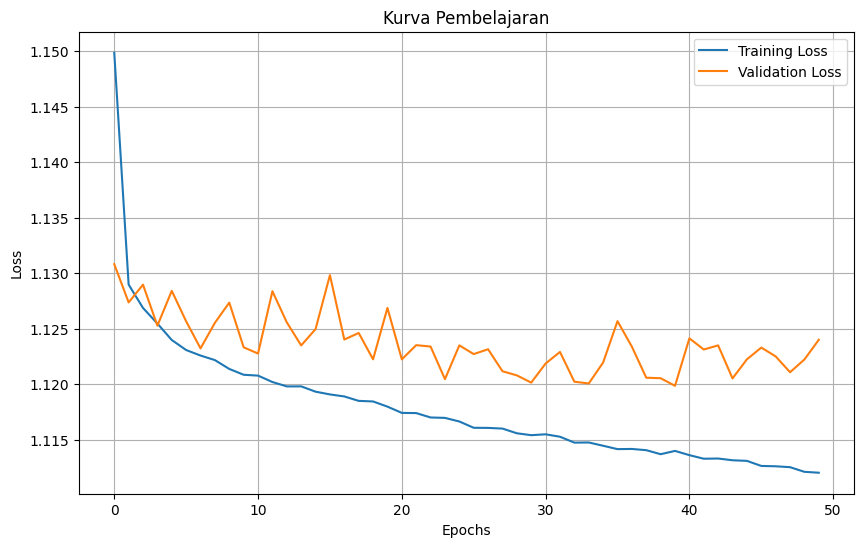

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Kurva Pembelajaran')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [15]:
# Transformasi data uji dengan scaler dan encoding y_test
X_test_scaled = scaler.transform(X_test)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Evaluasi akurasi pada data uji
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Akurasi Uji: {test_accuracy:.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Akurasi Uji: 0.5176
